# Credit Risk Classification
---


## Dataset Description
---

**Description**
- We're working as data scientist in a risk analyst team in a finance industry and the company generates profit by giving loans to customers
- However, our company might suffer loss if the customers did not pay the loan back (we called it as default customers)
- To minimize the loss, the simple thing to do is to prevent bad applicants (who later become a default customers)
- As a data scientist, you want to create classifier model to classify good or bad applicants from the given customers data **to minimize the potential loss**
- The dataset contains of the following fields

<center>

|Feature|Type|Descriptions|
|:--|:--|:--|
|`person_age`|`int`|Age|
|`person_income`|`int`|Annual Income|
|`person_home_ownership`|`str`|Home Ownership|
|`person_emp_length`|`float`|Employment length (in years)|
|`loan_intent`|`str`|Loan Intent|
|`loan_grade`|`str`|Loan Grade|
|`loan_amnt`|`int`|Loan Amount|
|`loan_int_rate`|`float`|Interest Rate|
|`loan_percent_income`|`float`|Percent Income|
|`cb_percent_default_on_file`|`str`|Historical Default|
|`cb_person_cred_hist_length`|`int`|Credit History Length|
|`loan_status`| `int` | Loan Status (0 is non default 1 is deafult) , (**our target**)|

</center>


Description of data :
-  person_age: Age of the individual applying for the loan.
-  person_income: Annual income of the individual.
-  person_home_ownership: Type of home ownership of the individual.
  -  rent: The individual is currently renting a property.
  -  mortgage: The individual has a mortgage on the property they own.
  -  own: The individual owns their home outright.
  -  other: Other categories of home ownership that may be specific to the dataset.
-  person_emp_length: Employment length of the individual in years.
-  loan_intent: The intent behind the loan application.
-  loan_grade: The grade assigned to the loan based on the creditworthiness of the borrower.
  -  A: The borrower has a high creditworthiness, indicating low risk.
  -  B: The borrower is relatively low-risk, but not as creditworthy as Grade A.
  -  C: The borrower's creditworthiness is moderate.
  -  D: The borrower is considered to have higher risk compared to previous grades.
  -  E: The borrower's creditworthiness is lower, indicating a higher risk.
  -  F: The borrower poses a significant credit risk.
  -  G: The borrower's creditworthiness is the lowest, signifying the highest risk.
-  loan_amnt: The loan amount requested by the individual.
-  loan_int_rate: The interest rate associated with the loan.
-  loan_status: Loan status, where 0 indicates non-default and 1 indicates default.
  -  0: Non-default - The borrower successfully repaid the loan as agreed, and there was no default.
  -  1: Default - The borrower failed to repay the loan according to the agreed-upon terms and defaulted on the loan.
-  loan_percent_income: The percentage of income represented by the loan amount.
-  cb_person_default_on_file: Historical default of the individual as per credit bureau records.
  -  Y: The individual has a history of defaults on their credit file.
  -  N: The individual does not have any history of defaults.
-  cb_preson_cred_hist_length: The length of credit history for the individual.

## Modeling Workflow
---

```
1. Data Preparation
2. Training a Machine Learning Models
3. Model Evaluation
```

### 1. Data Preparation
---

```
1.1. Load data and drop duplicates
1.2. Input-output Split
1.3. Train, test, valid Split
1.4. Perform EDA
1.5. Data Preprocessing
```

#### 1.1. Load data and drop duplicates
---

In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Pacmann/Machine Learning/credit_risk_dataset.csv')
data.duplicated(keep='last').sum()

165

-  Since this data does not have a unique column, the duplicate check will only show records that have the same values for every field. There are 165 duplicate records. Therefore, these 165 records will be deleted.

In [ ]:
def read_data(fname):
   # read data
  df = pd.read_csv(fname, sep=',')
  print("Data shape raw               : ", df.shape, "- (#observasi, #kolom)")

  # drop duplicate
  data_duplicated = df.duplicated(keep='last').sum()
  print("Number of duplicate order id : ", data_duplicated)
  df = df.drop_duplicates(keep='last')
  print("Data shape after dropping    : ", df.shape, "- (#observasi, #kolom)")

  return df

In [ ]:
filename = '/content/drive/MyDrive/Pacmann/Machine Learning/credit_risk_dataset.csv'
data_backup = pd.read_csv(filename)

In [ ]:
data = read_data(fname=filename)

Data shape raw               :  (32581, 12) - (#observasi, #kolom)
Number of duplicate order id :  165
Data shape after dropping    :  (32416, 12) - (#observasi, #kolom)


#### 1.2. Input-output Split
---

In [ ]:
def split_input_output(data, target_col):
  output_data = data[target_col]
  input_data = data.drop(target_col,
                         axis = 1)
  print("X shape: ", input_data.shape)
  print("y shape: ", output_data.shape)

  return input_data, output_data

In [ ]:
X, y = split_input_output(data=data,
                          target_col='loan_status')

X shape:  (32416, 11)
y shape:  (32416,)


In [ ]:
X.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4


In [ ]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: loan_status, dtype: int64

In [ ]:
y.value_counts()

loan_status
0    25327
1     7089
Name: count, dtype: int64

#### 1.3. Train, test, valid Split
---

- Now, we want to split the data before modeling.
- Split the data into three set:
  - Train, for training the model
  - Validation, for choosing the best model
  - Test, for error generalization

-  Splitting proportion train (80%), valid (10%), and test (10%)

In [ ]:
from sklearn.model_selection import train_test_split

def split_train_test(X, y, test_size, seed):
  X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = test_size,
                                                    random_state = seed)
  print("X train shape: ",X_train.shape)
  print("y train shape: ",y_train.shape)
  print("X test shape: ",X_test.shape)
  print("X test shape: ",y_test.shape)
  print("")
  return X_train, X_test, y_train, y_test


In [ ]:
# Split the data
# First, split the train & not train
X_train, X_not_train, y_train, y_not_train = split_train_test(X = X, y = y,
                                                              test_size = 0.2,
                                                              seed = 123)

# Then, split the valid & test
X_valid, X_test, y_valid, y_test = split_train_test(X = X_not_train, y = y_not_train,
                                                              test_size = 0.5,
                                                              seed = 123)

X train shape:  (25932, 11)
y train shape:  (25932,)
X test shape:  (6484, 11)
X test shape:  (6484,)

X train shape:  (3242, 11)
y train shape:  (3242,)
X test shape:  (3242, 11)
X test shape:  (3242,)



#### 1.4. Perform EDA
---

-  Check missing value

In [ ]:
100 * (X_train.isna().sum(0) / len(X))

person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             2.221125
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 7.635118
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

- We will impute all these variables using central tendency (mean or median) if there is any missing value

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

-  Split the categorical and numerical column

In [ ]:
def split_numerical_categorical(data, num_cols, cat_cols):
  numerical_data = data[num_cols]
  categorical_data = data[cat_cols]
  return numerical_data, categorical_data

In [ ]:
categorical_col = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
numerical_col = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

# Split the data
X_num, X_cat = split_numerical_categorical(X_train, numerical_col, categorical_col)

- First, check the features distribution of numerical column

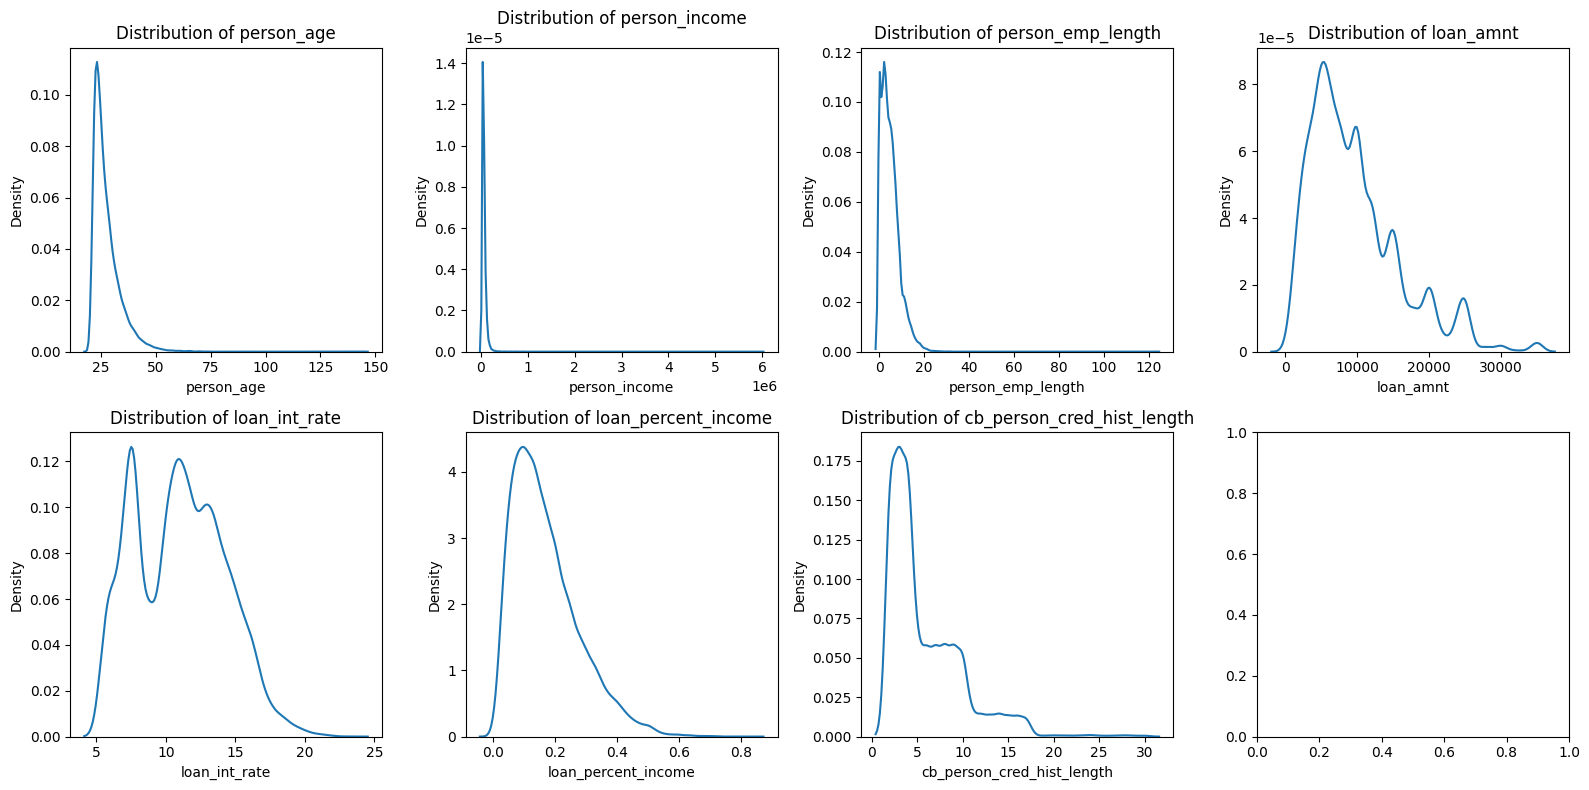

In [ ]:
# Plot data numerik
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
axes = ax.flatten()

for i, col in enumerate(X_num.columns):
    sns.kdeplot(X_num[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [ ]:
X_train.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,25932.000000,2.593200e+04,25212.000000,25932.000000,23457.000000,25932.000000,25932.000000
mean,27.740938,6.603247e+04,4.791924,9573.816135,11.010300,0.170254,5.796930
std,6.389428,6.395482e+04,4.177626,6296.965971,3.236751,0.106729,4.058634
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000
25%,23.000000,3.840000e+04,2.000000,5000.000000,7.900000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.150000,4.000000
75%,30.000000,7.900000e+04,7.000000,12000.000000,13.470000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000


Summary:
- Our data obviously have anomalies, e.g.
  - there's personal_emp_length more than 100 years, or
  - person_age more than 90
- We have to clean the data from this anomalies
- We can assume that our numerical data have a skewed distribution, thus we'll use median to imput the missing values.

- Let's find the cut-off value of each features

In [ ]:
X_train[X_train['person_emp_length' ] > 100]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0.10,N,4
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59,Y,3


In [ ]:
X_train[X_train['person_age' ] > 90]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0.26,N,4
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0.02,N,3
32416,94,24000,RENT,1.0,MEDICAL,C,6500,NaN,0.27,N,27
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0.25,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0.03,N,2
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0.00,N,25


- Check the features distribution of categorical column

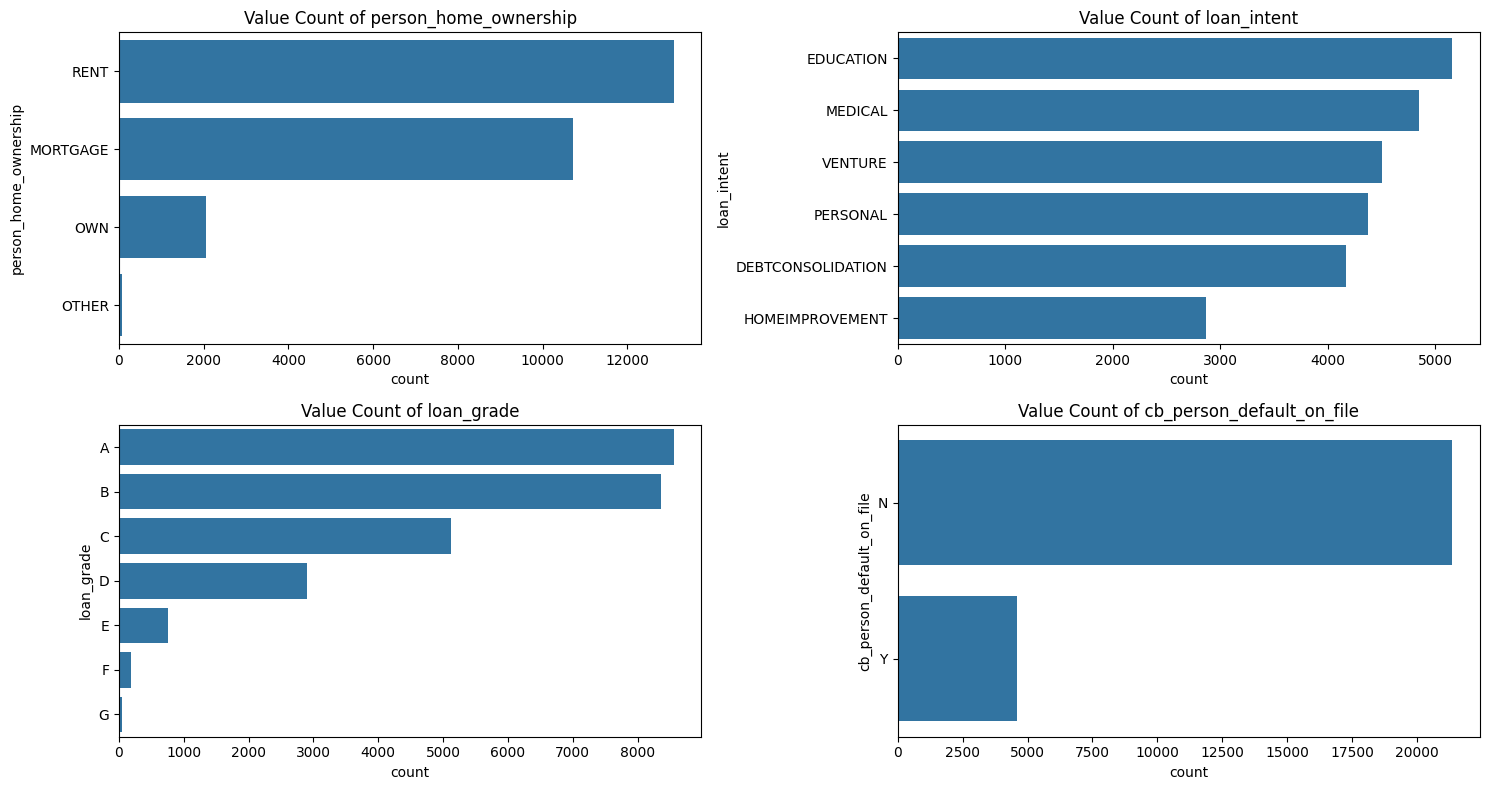

In [ ]:
# Plot data categorical
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))
axes = ax.flatten()

for i, col in enumerate(X_cat.columns):
    sns.countplot(X_cat[col], ax=axes[i], order = X_cat[col].value_counts().index)
    axes[i].set_title(f'Value Count of {col}')

plt.tight_layout()
plt.show()

Summary:
- Most people who take out loans own a house that is not their own property (rent) or the house owner could use their private house as mortage for the loan
- Educational reasons are the most frequently used reasons for taking out loans
- Most of people have a high creditworthiness, indicating low risk.
- Most people have no track record of defaulting on a loan

**Conclusion for preprocessing**
- Remove the data from anomalous data
- Generate imputer for numerical column
- Encoding categorical column
- Standardize column

#### 1.5. Data Preprocesing
---

```
1.5.1. Remove and preprocess anomalous data
1.5.2. Handling missing value for numerical column
1.5.3. Encoding categorical column
1.5.4. Standardize column
```

##### 1.5.1. Remove and preprocess anomalous data
---

In [ ]:
# Concat the data first
train_data = pd.concat((X_train, y_train), axis=1)
train_data.shape

(25932, 12)

-  Drop **person_emp_length > 100** and **person_age > 90**

In [ ]:
train_data_cleaned = train_data[~((train_data['person_emp_length'] > 100) | (train_data['person_age'] > 90))]
train_data_cleaned.shape

(25924, 12)

-  Check The EDA Again

In [ ]:
X_train_no_anomalous, y_train_no_anomalous = split_input_output(data=train_data_cleaned, target_col='loan_status')

X shape:  (25924, 11)
y shape:  (25924,)


In [ ]:
X_num_no_anomalous, X_cat_no_anomalous = split_numerical_categorical(X_train_no_anomalous, numerical_col, categorical_col)

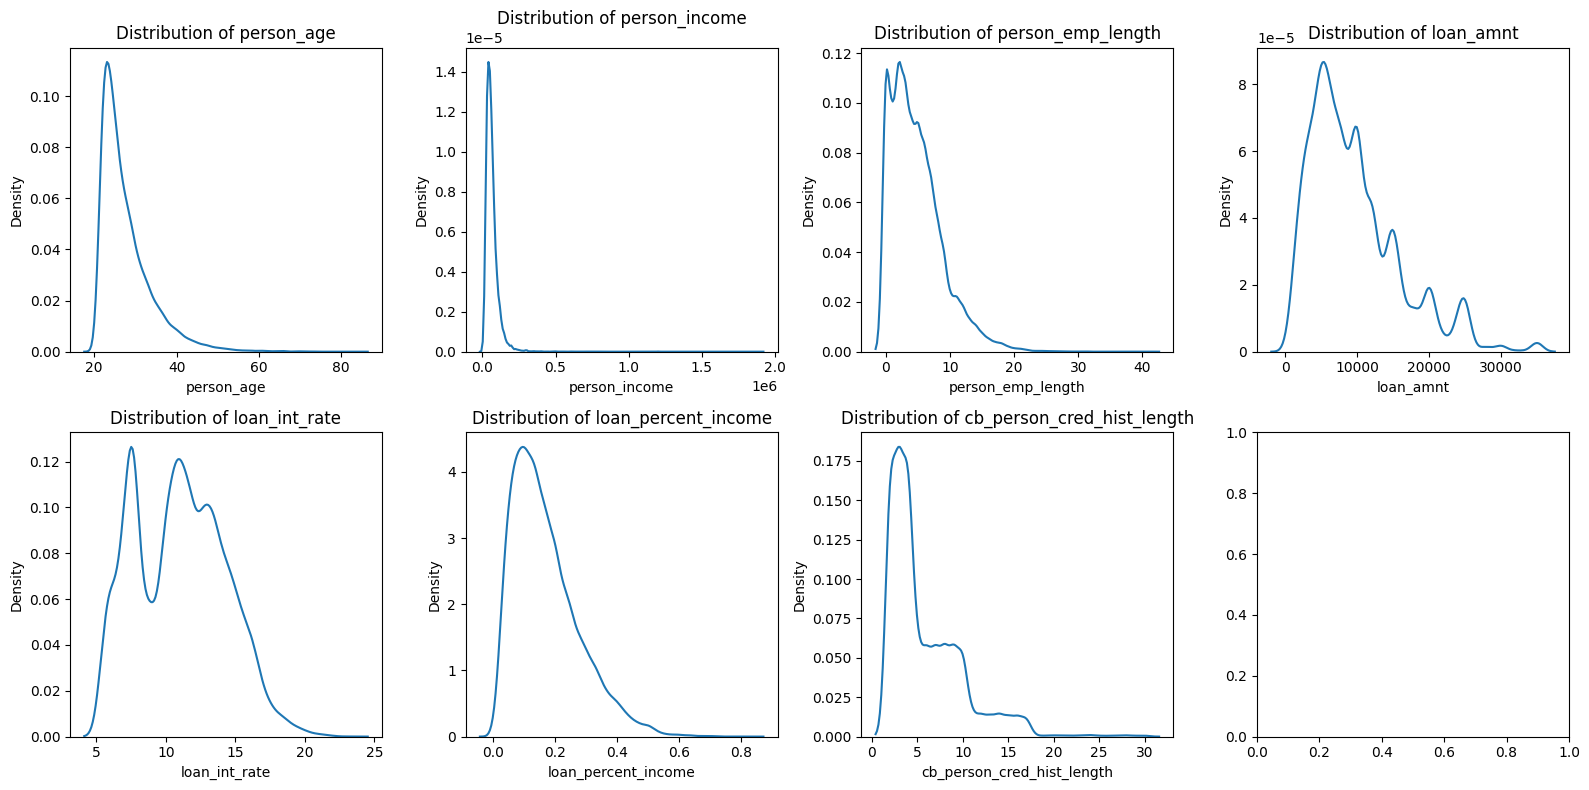

In [ ]:
# Plot data numerik
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
axes = ax.flatten()

for i, col in enumerate(X_num_no_anomalous.columns):
    sns.kdeplot(X_num_no_anomalous[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [ ]:
X_num_no_anomalous.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,25924.000000,2.592400e+04,25204.000000,25924.000000,23451.000000,25924.000000,25924.000000
mean,27.718060,6.578734e+04,4.782495,9572.230366,11.010091,0.170248,5.795981
std,6.196789,5.225322e+04,4.043016,6294.729893,3.236797,0.106696,4.055159
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000
25%,23.000000,3.840000e+04,2.000000,5000.000000,7.900000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.150000,4.000000
75%,30.000000,7.900000e+04,7.000000,12000.000000,13.470000,0.230000,8.000000
max,84.000000,1.900000e+06,41.000000,35000.000000,23.220000,0.830000,30.000000


-  It can be seen that outlier data is no longer visible in the graph or in descriptive statistics

In [ ]:
def delete_anomalous_data(X, y):
  data = pd.concat((X, y), axis=1)
  train_data_cleaned = data[~((data['person_emp_length'] > 100) | (data['person_age'] > 90))]
  X_train_no_anomalous, y_train_no_anomalous = split_input_output(data=train_data_cleaned, target_col='loan_status')
  X_num_no_anomalous, X_cat_no_anomalous = split_numerical_categorical(X_train_no_anomalous, numerical_col, categorical_col)

  return X_num_no_anomalous, X_cat_no_anomalous

##### 1.5.2. Handling missing value for numerical data
---

In [ ]:
X_num_no_anomalous.isna().sum(0)

person_age                       0
person_income                    0
person_emp_length              720
loan_amnt                        0
loan_int_rate                 2473
loan_percent_income              0
cb_person_cred_hist_length       0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer

def numericalImputation(data):
    # Buat imputer
    imputer_numerical = SimpleImputer(missing_values = np.nan,
                                      strategy = "median")
    imputer_numerical.fit(data)

    # Transform
    imputed_data = imputer_numerical.transform(data)
    numerical_data_imputed = pd.DataFrame(imputed_data)

    numerical_data_imputed.columns = data.columns
    numerical_data_imputed.index = data.index

    return numerical_data_imputed, imputer_numerical

In [ ]:
X_train_num_imputed , num_imputer = numericalImputation(data = X_num_no_anomalous)

In [ ]:
# Validate
X_train_num_imputed.isna().sum(0)

person_age                    0
person_income                 0
person_emp_length             0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_cred_hist_length    0
dtype: int64

##### 1.5.3. Encoding categorical column
---

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

def encoding_categorical_data(data):
  encoder = OneHotEncoder(sparse_output=False)
  encoder.fit(data)

  encoded_data = encoder.transform(data)
  categorical_columns = data.columns.tolist()
  categorical_data_encoded = pd.DataFrame(encoded_data, columns = encoder.get_feature_names_out(categorical_columns))
  categorical_data_encoded.index = data.index

  return categorical_data_encoded, encoder

In [ ]:
X_train_cat_encoded, encoder = encoding_categorical_data(data = X_cat_no_anomalous)

In [ ]:
# Validate
print('Original shape:', X_cat_no_anomalous.shape)
print('Encoded shape :', X_train_cat_encoded.shape)

Original shape: (25924, 4)
Encoded shape : (25924, 19)


-  Join Data

In [ ]:
def concat_data(num_data, cat_data):
  concated_data = pd.concat([num_data,
                            cat_data],
                           axis = 1)

  return concated_data

In [ ]:
# Concat the data
X_train_concat = concat_data(X_train_num_imputed, X_train_cat_encoded)

In [ ]:
# Validate
print('Num Cols: ',X_train_num_imputed.shape)
print('Cat Cols: ',X_train_cat_encoded.shape)
print('Concat Cols: ',X_train_concat.shape)
X_train_concat.head()

Num Cols:  (25924, 7)
Cat Cols:  (25924, 19)
Concat Cols:  (25924, 26)


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
5871,21.0,44000.0,0.0,5500.0,15.28,0.13,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
27502,29.0,144000.0,4.0,5000.0,13.06,0.03,7.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3261,22.0,36000.0,6.0,12000.0,7.29,0.33,3.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9545,22.0,56400.0,6.0,25000.0,16.40,0.44,3.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
29018,31.0,60000.0,5.0,19400.0,18.53,0.32,10.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


##### 1.5.4. Standardize data
---

In [ ]:
from sklearn.preprocessing import StandardScaler

def standardized_data(data):
  standardizer = StandardScaler()
  standardizer.fit(data)

  standardized_data_raw = standardizer.transform(data)
  standardized_data = pd.DataFrame(standardized_data_raw)
  standardized_data.columns = data.columns
  standardized_data.index = data.index

  return standardized_data, standardizer

In [ ]:
X_train_clean, standardizer = standardized_data(data = X_train_concat)

In [ ]:
X_train_clean.describe().round(4)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
count,25924.0000,25924.0000,25924.0000,25924.0000,25924.0000,25924.0000,25924.0000,25924.0000,25924.0000,25924.0000,...,25924.0000,25924.0000,25924.0000,25924.0000,25924.0000,25924.0000,25924.0000,25924.0000,25924.0000,25924.0000
mean,0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,-0.0000,-0.0000,0.0000,-0.0000,...,0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000
std,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
min,-1.2455,-1.1825,-1.1936,-1.4413,-1.8152,-1.5957,-0.9361,-0.8384,-0.0567,-0.2936,...,-0.4585,-0.7017,-0.6901,-0.4957,-0.3545,-0.1738,-0.0862,-0.0435,-2.1582,-0.4634
25%,-0.7614,-0.5241,-0.6922,-0.7264,-0.8180,-0.7521,-0.6895,-0.8384,-0.0567,-0.2936,...,-0.4585,-0.7017,-0.6901,-0.4957,-0.3545,-0.1738,-0.0862,-0.0435,0.4634,-0.4634
50%,-0.2773,-0.2064,-0.1907,-0.2498,-0.0059,-0.1898,-0.4429,-0.8384,-0.0567,-0.2936,...,-0.4585,-0.7017,-0.6901,-0.4957,-0.3545,-0.1738,-0.0862,-0.0435,0.4634,-0.4634
75%,0.3683,0.2529,0.5614,0.3857,0.6827,0.5600,0.5435,1.1927,-0.0567,-0.2936,...,-0.4585,1.4251,1.4491,-0.4957,-0.3545,-0.1738,-0.0862,-0.0435,0.4634,-0.4634
max,9.0826,35.1031,9.0860,4.0396,3.9668,6.1836,5.9688,1.1927,17.6448,3.4063,...,2.1811,1.4251,1.4491,2.0172,2.8210,5.7542,11.6072,22.9796,0.4634,2.1582


##### 1.5.5. Function for preprocessing
---

In [ ]:
def preprocessing(data, numerical_column, categorical_column, num_imputer, encoder, standardizer):

  # Filter data
  numerical_data = data[numerical_column]
  categorical_data = data[categorical_column]

  # Numerik imputer
  numerical_data_imputed = pd.DataFrame(num_imputer.transform(numerical_data))
  numerical_data_imputed.columns = numerical_column
  numerical_data_imputed.index = numerical_data.index

  # Encoding categorical
  encoded_data = encoder.transform(categorical_data)
  categorical_columns = categorical_data.columns.tolist()
  categorical_data_encoded = pd.DataFrame(encoded_data, columns = encoder.get_feature_names_out(categorical_columns))
  categorical_data_encoded.index = categorical_data.index

  # Gabungkan data
  concat_data = pd.concat([numerical_data_imputed, categorical_data_encoded],
                             axis = 1)

  # Standardize
  cleaned_data = pd.DataFrame(standardizer.transform(concat_data))
  cleaned_data.columns = concat_data.columns

  return cleaned_data

In [ ]:
X_test.shape

(3242, 11)

In [ ]:
X_test_cleaned = preprocessing(data = X_test,
                               numerical_column = numerical_col,
                               categorical_column = categorical_col,
                               num_imputer = num_imputer,
                               encoder = encoder,
                               standardizer = standardizer)
print(X_test_cleaned.shape)
X_test_cleaned.head()

(3242, 26)


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,-0.600009,-0.168172,0.812150,0.766969,-1.142828,0.747485,-0.442896,-0.838421,-0.056674,-0.293574,...,-0.458491,1.425126,-0.690091,-0.495729,-0.354489,-0.173787,-0.086153,-0.043517,0.463351,-0.463351
1,-0.922763,-0.551007,-0.692186,1.378604,1.170001,2.996913,-0.936105,-0.838421,-0.056674,-0.293574,...,-0.458491,-0.701692,-0.690091,-0.495729,2.820965,-0.173787,-0.086153,-0.043517,-2.158192,2.158192
2,-0.922763,-0.589206,0.310705,-0.249774,-1.695048,0.560032,-0.689501,1.192718,-0.056674,-0.293574,...,-0.458491,1.425126,-0.690091,-0.495729,-0.354489,-0.173787,-0.086153,-0.043517,0.463351,-0.463351
3,3.111662,0.080622,-0.692186,-0.090908,0.604787,-0.377229,2.023146,-0.838421,-0.056674,-0.293574,...,-0.458491,-0.701692,-0.690091,2.017231,-0.354489,-0.173787,-0.086153,-0.043517,0.463351,-0.463351
4,-0.922763,-0.055258,0.310705,0.385690,1.735214,-0.096051,-0.936105,1.192718,-0.056674,-0.293574,...,-0.458491,-0.701692,-0.690091,-0.495729,-0.354489,5.754175,-0.086153,-0.043517,-2.158192,2.158192


In [ ]:
X_valid_cleaned = preprocessing(data = X_valid,
                               numerical_column = numerical_col,
                               categorical_column = categorical_col,
                               num_imputer = num_imputer,
                               encoder = encoder,
                               standardizer = standardizer)
print(X_valid_cleaned.shape)
X_valid_cleaned.head()

(3242, 26)


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,-0.922763,0.386829,0.310705,-0.567506,-1.815237,-0.939586,-0.689501,-0.838421,-0.056674,-0.293574,...,-0.458491,1.425126,-0.690091,-0.495729,-0.354489,-0.173787,-0.086153,-0.043517,0.463351,-0.463351
1,0.206876,2.338899,-1.193631,2.450950,0.380650,-0.377229,-0.196292,-0.838421,-0.056674,-0.293574,...,-0.458491,-0.701692,1.449084,-0.495729,-0.354489,-0.173787,-0.086153,-0.043517,0.463351,-0.463351
2,-0.600009,-0.110758,0.812150,1.815485,-0.005904,1.684746,-0.442896,1.192718,-0.056674,-0.293574,...,-0.458491,-0.701692,-0.690091,2.017231,-0.354489,-0.173787,-0.086153,-0.043517,-2.158192,2.158192
3,1.820646,-0.895490,0.059982,-1.202971,-1.016142,-0.564682,1.529937,-0.838421,-0.056674,-0.293574,...,-0.458491,1.425126,-0.690091,-0.495729,-0.354489,-0.173787,-0.086153,-0.043517,0.463351,-0.463351
4,-0.761386,-1.075310,-0.441463,-1.187084,-0.126093,0.466306,-0.689501,-0.838421,-0.056674,-0.293574,...,-0.458491,-0.701692,1.449084,-0.495729,-0.354489,-0.173787,-0.086153,-0.043517,0.463351,-0.463351


In [ ]:
train_data = pd.concat((X_train_clean, y_train_no_anomalous), axis=1)
corr = train_data.corr()
corr

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y,loan_status
person_age,1.000000,0.145258,0.172495,0.053109,0.007159,-0.041953,0.878503,0.033519,-0.008881,0.000252,...,-0.002642,-0.001613,-0.004148,0.006107,0.004660,0.006540,0.008716,-0.004763,0.004763,-0.023227
person_income,0.145258,1.000000,0.156957,0.322167,-0.004975,-0.296831,0.128806,0.238504,0.012577,-0.045909,...,0.012919,0.007854,-0.020381,-0.018253,0.013652,0.017589,0.007038,0.006031,-0.006031,-0.174890
person_emp_length,0.172495,0.156957,1.000000,0.115930,-0.052907,-0.055853,0.151574,0.222510,-0.012008,0.019971,...,0.049124,-0.002260,-0.039264,-0.010892,-0.018586,-0.010891,0.024877,0.030826,-0.030826,-0.089855
loan_amnt,0.053109,0.322167,0.115930,1.000000,0.142453,0.570642,0.042871,0.132587,0.016535,-0.024617,...,-0.119667,0.046502,-0.029555,0.071257,0.090787,0.071122,0.056441,-0.038420,0.038420,0.104965
loan_int_rate,0.007159,-0.004975,-0.052907,0.142453,1.000000,0.117604,0.011116,-0.129920,0.018616,-0.009766,...,-0.761639,-0.003283,0.356454,0.458040,0.311359,0.184473,0.121023,-0.480156,0.480156,0.321009
loan_percent_income,-0.041953,-0.296831,-0.055853,0.570642,0.117604,1.000000,-0.032678,-0.147804,0.015676,0.051446,...,-0.109690,0.031606,-0.000071,0.069690,0.059413,0.039371,0.034359,-0.034750,0.034750,0.382106
cb_person_cred_hist_length,0.878503,0.128806,0.151574,0.042871,0.011116,-0.032678,1.000000,0.025141,-0.009441,0.006711,...,-0.007102,0.001164,0.000869,0.004484,0.000905,0.005224,0.010074,-0.002240,0.002240,-0.019461
person_home_ownership_MORTGAGE,0.033519,0.238504,0.222510,0.132587,-0.129920,-0.147804,0.025141,1.000000,-0.047517,-0.246139,...,0.135385,-0.035215,-0.065756,-0.054137,-0.021233,-0.004436,-0.000408,0.063339,-0.063339,-0.189984
person_home_ownership_OTHER,-0.008881,0.012577,-0.012008,0.016535,0.018616,0.015676,-0.009441,-0.047517,1.000000,-0.016638,...,-0.013628,0.001789,-0.009220,0.016770,0.018485,0.011086,-0.002466,-0.018491,0.018491,0.016448
person_home_ownership_OWN,0.000252,-0.045909,0.019971,-0.024617,-0.009766,0.051446,0.006711,-0.246139,-0.016638,1.000000,...,0.012549,-0.005062,-0.002074,-0.000739,-0.012948,-0.003597,0.000368,0.002832,-0.002832,-0.101554


### 2. Modelling
---

```
2.1. Define metrics
2.2. Define baseline model
2.3. Train and evaluate several model
2.4. Hyperparameter tuning
2.5. Define best model
```

#### 2.1. Define metrics
---

Metrics to be used:

1.  Accuracy
  -  The most basic metric, showing the percentage of the model's correct predictions.
 -  Easy to interpret, but it does not consider minority classes and does not differentiate between true positives and false positives.

2.  Recall
  -  Measures the model's ability to identify borrowers who will default (true positive).
  -  Recall considers False Negatives in the evaluation process.
  -  Recall measures how well the model recognizes actual loan defaults. For lenders, missing loans that eventually default can result in significant financial losses. Therefore, achieving high Recall is crucial as it ensures most potential defaults are detected, minimizing the risk of financial setbacks.

3. Precision
  -  Measures the proportion of correct default predictions (true positives) out of all default predictions.
  - Precision considers False Positives in the evaluation process.
  -  Precision is an important metric as it evaluates the accuracy of positive predictions. Lenders need to avoid false positives (incorrectly predicting defaults) to prevent unnecessary actions. Maintaining high Precision ensures that when the model predicts a default, it is likely to be accurate. This protects lenders from unnecessary costs and maintains borrower relationships.

4.  F1 Score
  -  The harmonic mean of precision and recall.
  -  Useful when you want to balance both metrics.
  -  A good F1-Score indicates that our classification model has good precision and recall.

5.  AUC-ROC Score
  -  Measures the model's ability to distinguish between borrowers who default and those who do not across all thresholds.
  -  Represented as a curve that shows the True Positive Rate (TPR) against the False Positive Rate (FPR) at various thresholds.

#### 2.2. Define baseline model
---

- A Dummy Classifier is a type of classifier in machine learning that makes predictions using simple rules rather than a sophisticated algorithm. It is typically used as a baseline to compare the performance of more complex models.

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, roc_curve,  precision_score, recall_score, f1_score, roc_auc_score,  roc_curve

def extract_cv_results(cv_obj):
    train_cv_score = (np.mean(cv_obj.cv_results_['mean_train_score']))
    valid_cv_score = (cv_obj.best_score_)
    best_params = cv_obj.best_params_
    return train_cv_score, valid_cv_score, best_params

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV

base = GridSearchCV(estimator=DummyClassifier(),
                    param_grid={},
                    cv=10,
                    scoring = 'accuracy',
                    return_train_score=True
                    )

base.fit(X_train_clean, y_train_no_anomalous)

GridSearchCV(cv=10, estimator=DummyClassifier(), param_grid={},
             return_train_score=True, scoring='accuracy')

In [ ]:
# Validate the CV Score
train_base, valid_base, best_param_base = extract_cv_results(base)

print(f'Train score - Baseline model: {train_base}')
print(f'Valid score - Baseline model: {valid_base}')
print(f'Best Params - Baseline model: {best_param_base}')

Train score - Baseline model: 0.782402407050237
Valid score - Baseline model: 0.7824024081929982
Best Params - Baseline model: {}


#### 2.3.Train and evaluate several model
---

In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
def evaluate_models(models, X_train, y_train, X_valid, y_valid):
    train_acc = []
    test_acc = []
    test_precision = []
    test_recall = []
    test_f1 = []

    for model in models:
        model.fit(X_train, y_train)
        train_accuracy = accuracy_score(y_train, model.predict(X_train))
        test_accuracy = accuracy_score(y_valid, model.predict(X_valid))
        precision = precision_score(y_valid, model.predict(X_valid))
        recall = recall_score(y_valid, model.predict(X_valid))
        f1 = f1_score(y_valid, model.predict(X_valid))
        train_acc.append(train_accuracy)
        test_acc.append(test_accuracy)
        test_precision.append(precision)
        test_recall.append(recall)
        test_f1.append(f1)

    summary_df = pd.DataFrame(
        data={
            'model': [model.__class__.__name__ for model in models],
            'train_accuracy': train_acc,
            'test_accuracy': test_acc,
            'test_precision': test_precision,
            'test_recall': test_recall,
            'test_f1': test_f1
        }
    )

    highlight_max = lambda s: ['background-color: blue' if v else '' for v in (s == s.max())]

    summary_df_styled = summary_df.style.apply(highlight_max, subset=['train_accuracy', 'test_accuracy', 'test_precision', 'test_recall', 'test_f1'])
    return summary_df_styled

models = [
    LogisticRegression(random_state=42),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(),
    RandomForestClassifier(n_estimators=100, random_state=42),
    AdaBoostClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    SVC(random_state=42)
]

summary_df_styled = evaluate_models(models, X_train_clean, y_train_no_anomalous, X_valid_cleaned, y_valid)
summary_df_styled

,model,train_accuracy,test_accuracy,test_precision,test_recall,test_f1
0,LogisticRegression,0.866996,0.863048,0.774194,0.515021,0.618557
1,DecisionTreeClassifier,1.000000,0.885256,0.725517,0.752504,0.738764
2,KNeighborsClassifier,0.919225,0.889883,0.847561,0.596567,0.700252
3,RandomForestClassifier,0.999961,0.929056,0.955340,0.703863,0.810544
4,AdaBoostClassifier,0.886399,0.883714,0.798148,0.616595,0.695722
5,GradientBoostingClassifier,0.928869,0.921962,0.938976,0.682403,0.790389
6,SVC,0.917027,0.904997,0.904762,0.625179,0.739425


-  Here is an explanation of the metrics mentioned above :
  - **Logreg** : Overall, logistic regression performs quite well in classifying the training data with an accuracy of `86.6%` and for the test data with an accuracy of `86.3%`. Meanwhile, the precision of `77.4%` indicates that about 77.4% of the credits predicted to default by this model actually default. The recall of `51.5%` shows that this model can only detect about 51.5% of all credits that actually default.

  -  **Decision Tree** : Overall, the decision tree model performs very well in classifying the training data with an accuracy of `100%` and for the test data with an accuracy of `88%`. However, this model tends to overfit because it fits the training data too closely. Meanwhile, the precision of `72.5%` indicates that about 72.5% of the credits predicted to default by this model actually default. The recall of `75.2%` shows that this model can detect about 75.2% of all credits that actually default.

  -  **KNN** : Overall, the KNN model performs very well in classifying the training data with an accuracy of `91.9%` and for the test data with an accuracy of `88.9%`. This model exhibits a balanced accuracy between the training and test datasets. Meanwhile, the precision of `84.7%` indicates that about 84.7% of the credits predicted to default by this model actually default. The recall of `59.6%` shows that this model can detect about 59.6% of all credits that actually default.

  -  **Random Forest** : Overall, the random forest model performs very well in classifying the training data with an accuracy of `99.9%` and for the test data with an accuracy of `92.9%`. This model has the highest accuracy on the test data among the other models. Meanwhile, the precision of `95.5%` indicates that about 95.5%of the credits predicted to default by this model actually default. The recall of `70.3%` shows that this model can detect about 70.3% of all credits that actually default.

  -  **Adaboost** : Overall, the AdaBoost model performs very well in classifying the training data with an accuracy of `88.6%` and for the test data with an accuracy of `88.3%`. Meanwhile, the precision of `79.8%` indicates that about `79.8%` of the credits predicted to default by this model actually default. The recall of `61.6%` shows that this model can detect about 61.6% of all credits that actually default.

  -  **Gradient Boost** : Overall, the Gradient Boosting model performs very well in classifying the training data with an accuracy of `92.8%` and for the test data with an accuracy of `86.3%`. Meanwhile, the precision of `77.4%` indicates that about 77.4% of the credits predicted to default by this model actually default. The recall of `92.1%` shows that this model can detect about 92.1% of all credits that actually default.

  -  **SVM** : Overall, the Support Vector Machine (SVM) model performs very well in classifying the training data with an accuracy of `91.7%` and for the test data with an accuracy of `90.4%`. Meanwhile, the precision of `90.4%` indicates that about 90.4% of the credits predicted to  default by this model actually default. The recall of `62.5%` shows that this model can detect about 62.5% of all credits that actually default.

Based on the explanation of the metrics above, the models chosen for hyperparameter tuning are Decision Tree and Random Forest. The Decision Tree model is selected because it has a high recall value, which will be the evaluation metric for the next stage, despite the model tending to overfit. Meanwhile, Random Forest is chosen because it has the highest accuracy on the test data, indicating that the model can predict data correctly, although its recall is lower than that of the Decision Tree.

#### 2.4.Hyperparameter tuning
---

-  **Logreg**

In [ ]:
# Hyperparameter Tuning Logistic Regression
logreg_param = {'C': [0.001, 0.01, 0.1, 10, 100]}

logreg_classifier = GridSearchCV(estimator=LogisticRegression(random_state=42),
                    param_grid=logreg_param,
                    cv=10,
                    scoring = 'accuracy',
                    return_train_score=True
                    )

logreg_classifier.fit(X_train_clean, y_train_no_anomalous)

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 10, 100]},
             return_train_score=True, scoring='accuracy')

In [ ]:
# Validate the CV Score logreg
train_logreg, valid_logreg, best_param_logreg = extract_cv_results(logreg_classifier)

print(f'Train score - Logreg model: {train_logreg}')
print(f'Valid score - Logreg model: {valid_logreg}')
print(f'Best Params - Logreg model: {best_param_logreg}')

Train score - Logreg model: 0.865056831587496
Valid score - Logreg model: 0.8666868123104464
Best Params - Logreg model: {'C': 10}


-  **KNN**

In [ ]:
# Hyperparameter Tuning KNN
knn_param = {'n_neighbors': [5,8,10],
             'p': [1,2]}

knn_classifier = GridSearchCV(estimator=KNeighborsClassifier(),
                    param_grid=knn_param,
                    cv=10,
                    scoring = 'accuracy',
                    return_train_score=True
                    )

knn_classifier.fit(X_train_clean, y_train_no_anomalous)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 8, 10], 'p': [1, 2]},
             return_train_score=True, scoring='accuracy')

In [ ]:
# Validate the CV Score KNN
train_knn, valid_knn, best_param_knn = extract_cv_results(knn_classifier)

print(f'Train score - KNN model: {train_knn}')
print(f'Valid score - KNN model: {valid_knn}')
print(f'Best Params - KNN model: {best_param_knn}')

Train score - KNN model: 0.912058470639746
Valid score - KNN model: 0.8980095389772084
Best Params - KNN model: {'n_neighbors': 8, 'p': 1}


-  **Decision Tree**

In [ ]:
# Hyperparameter Tuning Decicion Tree
dt_param = {'max_depth': [2, 10, 20, 30],
             'min_samples_split': [ 2, 10, 20, 25],
             'min_samples_leaf': [2, 5, 10, 20]}

dt_classifier = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                    param_grid=dt_param,
                    cv=10,
                    scoring = 'accuracy',
                    return_train_score=True
                    )

dt_classifier.fit(X_train_clean, y_train_no_anomalous)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 10, 20, 30],
                         'min_samples_leaf': [2, 5, 10, 20],
                         'min_samples_split': [2, 10, 20, 25]},
             return_train_score=True, scoring='accuracy')

In [ ]:
# Validate the CV Score Decision Tree
train_dt, valid_dt, best_param_dt = extract_cv_results(dt_classifier)

print(f'Train score - DT model: {train_dt}')
print(f'Valid score - DT model: {valid_dt}')
print(f'Best Params - DT model: {best_param_dt}')

Train score - DT model: 0.9181266613631665
Valid score - DT model: 0.9290618914646747
Best Params - DT model: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 20}


-  **Adaboost**

In [ ]:
# Hyperparameter Tuning adaboost
ab_param = {'n_estimators': [150, 300, 500],
             'learning_rate': [0.001, 0.1, 10]}

ab_classifier = GridSearchCV(estimator= AdaBoostClassifier(random_state=42),
                    param_grid=ab_param,
                    cv=10,
                    scoring = 'accuracy',
                    return_train_score=True
                    )

ab_classifier.fit(X_train_clean, y_train_no_anomalous)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'learning_rate': [0.001, 0.1, 10],
                         'n_estimators': [150, 300, 500]},
             return_train_score=True, scoring='accuracy')

In [ ]:
# Validate the CV Score
train_ab, valid_ab, best_param_ab = extract_cv_results(ab_classifier)

print(f'Train score - Adaboost model: {train_ab}')
print(f'Valid score - Adaboost model: {valid_ab}')
print(f'Best Params - Adaboost model: {best_param_ab}')

Train score - Adaboost model: 0.8474391380220372
Valid score - Adaboost model: 0.8838910730694701
Best Params - Adaboost model: {'learning_rate': 0.1, 'n_estimators': 500}


-  **Gradient Boost**

In [ ]:
# Hyperparameter Tuning Gradient Boosting
gb_param = {'max_depth': [4, 8, 10],
             'min_samples_split': [ 2, 10, 20],
             'min_samples_leaf': [2, 5, 10]}

gb_classifier = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42),
                    param_grid=gb_param,
                    cv=10,
                    scoring = 'accuracy',
                    return_train_score=True
                    )

gb_classifier.fit(X_train_clean, y_train_no_anomalous)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'max_depth': [4, 8, 10],
                         'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [2, 10, 20]},
             return_train_score=True, scoring='accuracy')

In [ ]:
# Validate the CV Score
train_gb, valid_gb, best_param_gb = extract_cv_results(gb_classifier)

print(f'Train score - Gradien Boost model: {train_gb}')
print(f'Valid score - Gradien Boost model: {valid_gb}')
print(f'Best Params - Gradien Boost model: {best_param_gb}')

Train score - DT model: 0.9578262332273029
Valid score - DT model: 0.936313757838054
Best Params - DT model: {'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 2}


-  **Random Forest**

In [ ]:
rf_param = {'max_depth': [2, 10, 30, 50],
             'min_samples_split': [2, 5, 10, 15],
             'min_samples_leaf': [2, 5, 10, 15]}

rf_classifier = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                    param_grid=rf_param,
                    cv=10,
                    scoring = 'accuracy',
                    return_train_score=True
                    )

rf_classifier.fit(X_train_clean, y_train_no_anomalous)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 10, 20, 30],
                         'min_samples_leaf': [2, 5, 10, 20],
                         'min_samples_split': [2, 10, 20, 25]},
             return_train_score=True, scoring='accuracy')

In [ ]:
# Validate the CV Score Random Forest
train_rf, valid_rf, best_param_rf = extract_cv_results(rf_classifier)

print(f'Train score - Random forest model: {train_rf}')
print(f'Valid score - Random forest model: {valid_rf}')
print(f'Best Params - Random forest model: {best_param_rf}')

Train score - Random forest model: 0.9033155315964785
Valid score - Random forest model: 0.9322249509600873
Best Params - Random forest model: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 10}


-  **SVM**

In [ ]:
svm_param = {'C': [0.001, 0.01, 10, 100]
             }

svm_classifier = GridSearchCV(estimator=SVC(random_state=42),
                    param_grid=svm_param,
                    cv=10,
                    scoring = 'accuracy',
                    return_train_score=True
                    )

svm_classifier.fit(X_train_clean, y_train_no_anomalous)

GridSearchCV(cv=10, estimator=SVC(random_state=42),
             param_grid={'C': [0.001, 0.01, 10, 100]}, return_train_score=True,
             scoring='accuracy')

In [ ]:
# Validate the CV Score
train_svm, valid_svm, best_param_svm = extract_cv_results(svm_classifier)

print(f'Train score - Random forest model: {train_svm}')
print(f'Valid score - Random forest model: {valid_svm}')
print(f'Best Params - Random forest model: {best_param_svm}')

Train score - Random forest model: 0.8735791787157947
Valid score - Random forest model: 0.9154451621887988
Best Params - Random forest model: {'C': 10}


In [ ]:
# Summarize
summary_df_tuning = pd.DataFrame(
    data={
        'model': ['Logreg', 'KNN', 'Decision Tree', 'Random Forest', 'Adaboost', 'Gradient Boost', 'SVM'],
        'train_score': [train_logreg, train_knn, train_dt, train_rf, train_ab, train_gb, train_svm],
        'valid_score': [valid_logreg, valid_knn, valid_dt, valid_rf, valid_ab, valid_gb, valid_svm],
        'best_params': [best_param_logreg, best_param_knn, best_param_dt, best_param_rf, best_param_ab, best_param_gb, best_param_svm]
    }
)

def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: blue' if v else '' for v in is_max]

summary_df_styled_tuning = summary_df_tuning.style.apply(highlight_max, subset=['valid_score'])
summary_df_styled_tuning

,model,train_score,valid_score,best_params
0,Logreg,0.865057,0.866687,{'C': 10}
1,KNN,0.912058,0.898010,"{'n_neighbors': 8, 'p': 1}"
2,Decision Tree,0.918127,0.929062,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 20}"
3,Random Forest,0.903316,0.932225,"{'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 10}"
4,Adaboost,0.847439,0.883891,"{'learning_rate': 0.1, 'n_estimators': 500}"
5,Gradient Boost,0.957826,0.936314,"{'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 2}"
6,SVM,0.873579,0.915445,{'C': 10}


-  Based on the hyperparameter tuning results, the gradient boost model has a higher accuracy, approximately `93.6%`, compared to the random forest model, which has an accuracy close to gradient boost, around `93.2%`. Therefore, the gradient boost model will be chosen as the best model for classification. It is also evident that after parameter tuning, both models experienced an increase in accuracy
-  Hyperparameter :
  -  `max_depth`: This parameter controls the maximum depth of the tree. Deeper trees can capture more complex relationships but are more prone to overfitting. The best max depth is 8.
  -  `min_samples_split`: This parameter defines the minimum number of samples required to split a node. Higher values reduce overfitting by preventing splits on small groups of data points. The best value for min_samples_split is 2.
  -  `min_samples_leaf`: The minimum number of samples allowed in a leaf node. Similar to min_samples_split, this helps prevent overly specific rules based on a few data points. The best value for min_samples_leaf is 5.

#### 2.5. Define best model
---

In [ ]:
best_model = GradientBoostingClassifier(max_depth=8, min_samples_leaf=5, min_samples_split=2)
best_model.fit(X_train_clean, y_train_no_anomalous)

GradientBoostingClassifier(max_depth=8, min_samples_leaf=5)

In [ ]:
# PREDICT & EVALUATE VALID DATA (best model)

y_pred = best_model.predict(X_valid_cleaned)
test_accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)

print(f'accuracy valid data: {test_accuracy}')
print(f'precision valid data: {precision}')
print(f'recall valid data: {recall}')

accuracy valid data: 0.933066008636644
precision valid data: 0.9616858237547893
recall valid data: 0.7181688125894135


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2543
           1       0.96      0.72      0.82       699

    accuracy                           0.93      3242
   macro avg       0.94      0.86      0.89      3242
weighted avg       0.93      0.93      0.93      3242



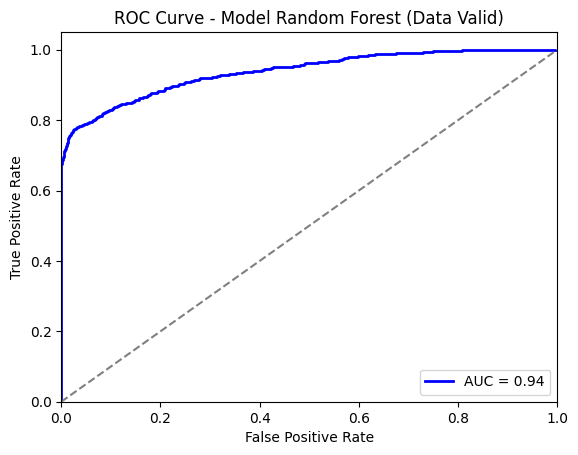

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

print("Classification Report:")
print(classification_report(y_valid, y_pred))

y_probs = best_model.predict_proba(X_valid_cleaned)[:, 1]

fpr, tpr, thresholds = roc_curve(y_valid, y_probs)

auc = roc_auc_score(y_valid, y_probs)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - Model Random Forest (Data Valid)')
plt.legend(loc="lower right")
plt.grid(False)
plt.show()

-  Evaluation for data validation :
  -  accuracy : `92.8%`
  -  precision : `96.2%`
  -  recall : `69.5%`

### 3. Model Evaluation
---

#### 3.1. How does best model perform?
---

In [ ]:
# PREDICT & EVALUATE TEST DATA (Best model)

y_pred = best_model.predict(X_test_cleaned)
test_accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'accuracy test data: {test_accuracy}')
print(f'precision test data: {precision}')
print(f'recall test data: {recall}')

accuracy test data: 0.9358420727945712
precision test data: 0.972027972027972
recall test data: 0.7433155080213903


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2494
           1       0.97      0.74      0.84       748

    accuracy                           0.94      3242
   macro avg       0.95      0.87      0.90      3242
weighted avg       0.94      0.94      0.93      3242



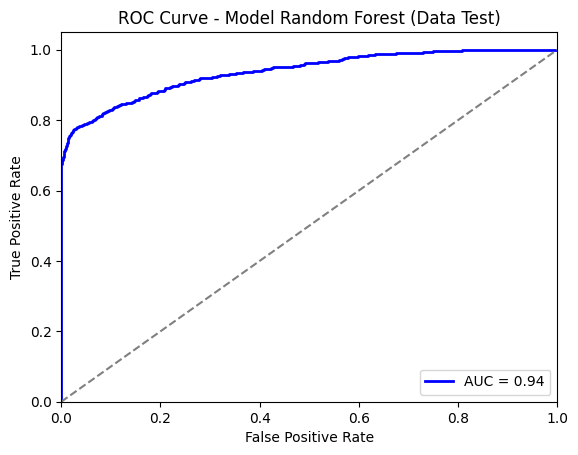

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

print("Classification Report:")
print(classification_report(y_test, y_pred))

y_probs = best_model.predict_proba(X_valid_cleaned)[:, 1]

fpr, tpr, thresholds = roc_curve(y_valid, y_probs)

auc = roc_auc_score(y_valid, y_probs)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - Model Gradient Boost (Data Test)')
plt.legend(loc="lower right")
plt.grid(False)
plt.show()

Overall, the evaluation results of the classification model show quite good performance on the test data for gradient boost (best model):

  -  Accuracy: The gradient boost model has an accuracy of around 93%, indicating that it can correctly predict the majority of cases in the dataset.

  -  Precision: The model has high precision for both classes, approximately 93% for the non-default class and 97% for the default class. This indicates that the model tends to make few errors when predicting a specific class.

  -  Recall: The recall for the non-default class is very high, even reaching 99%, which means the model can effectively identify all non-default cases. However, the recall for the default class is slightly lower, around 74%, indicating that the model has some difficulty in identifying a portion of the default cases.

  -  F1-score: A good F1-score indicates a balance between precision and recall. In this case, the F1-score for the non-default class is 96%, while for the default class, it is 84%.

  -  ROC AUC Score: A high ROC AUC score of 94% indicates that the model has a strong ability to distinguish between positive and negative classes, even in cases of class imbalance.

#### 3.2. Compare the financial impact
---

To make a financial impact comparison between the best model (gradient boost) and the baseline (with 78% accuracy), I need additional details regarding the assumptions made in the analysis. What specific assumptions would you like me to include?

Asumption:

-  Loss of potential income of Rp 10,000,000 per applicant if incorrectly classifying good applicants as bad.
-  Loss of average Rp 35,000,000 per applicant if incorrectly classifying bad applicants as good.

Certainly, with a baseline model accuracy of only 78%, the gradient boost model, which achieves 93% accuracy, is superior.

class:
-  0: 25327
-  1: 7089

Model gradient boost (misclassification) :
-  2% good applicants are classified as bad((2% * 25327 ) * Rp 10.000.000 = Rp 5.060.000.000)
-  27% bad applicants are classified as good ((27% * 7089 ) * Rp 35.000.000= Rp 66.990.000.000)

If you look at the comparison of the base model (majority vote) and the best model (gradient boost), of course the gradient boost model has better performance than the base model. However, what we need to highlight is how to minimize prediction errors, where if the actual applicant is default (1) but the prediction result is non-default (0), it will have a greater effect on finances than the actual applicant being non-default (0). but the prediction result is default (1)
